<a href="https://colab.research.google.com/github/Bheady23/MLA_CMB/blob/main/MLA5_CMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Assignment #5 - Ensemble Methods and Random Forest Classification  

**Christopher Burkhead**

**Standard Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Mounting Drive**


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**1. Imports for Ensemble Learning and Random Forests**

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
     

**Imports for performance measures**


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
     

**Imports for Splitting data and building pipeline**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

**Other Classifers**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

##Problem 1

**2. Aquire Data**

In [7]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

**3. Statistics and Visual Exploration**

In [8]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [9]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


1    1072
7    1038
3     961
2     479
5     470
4     415
Name: land_type, dtype: int64


<Axes: xlabel='land_type_train', ylabel='total'>

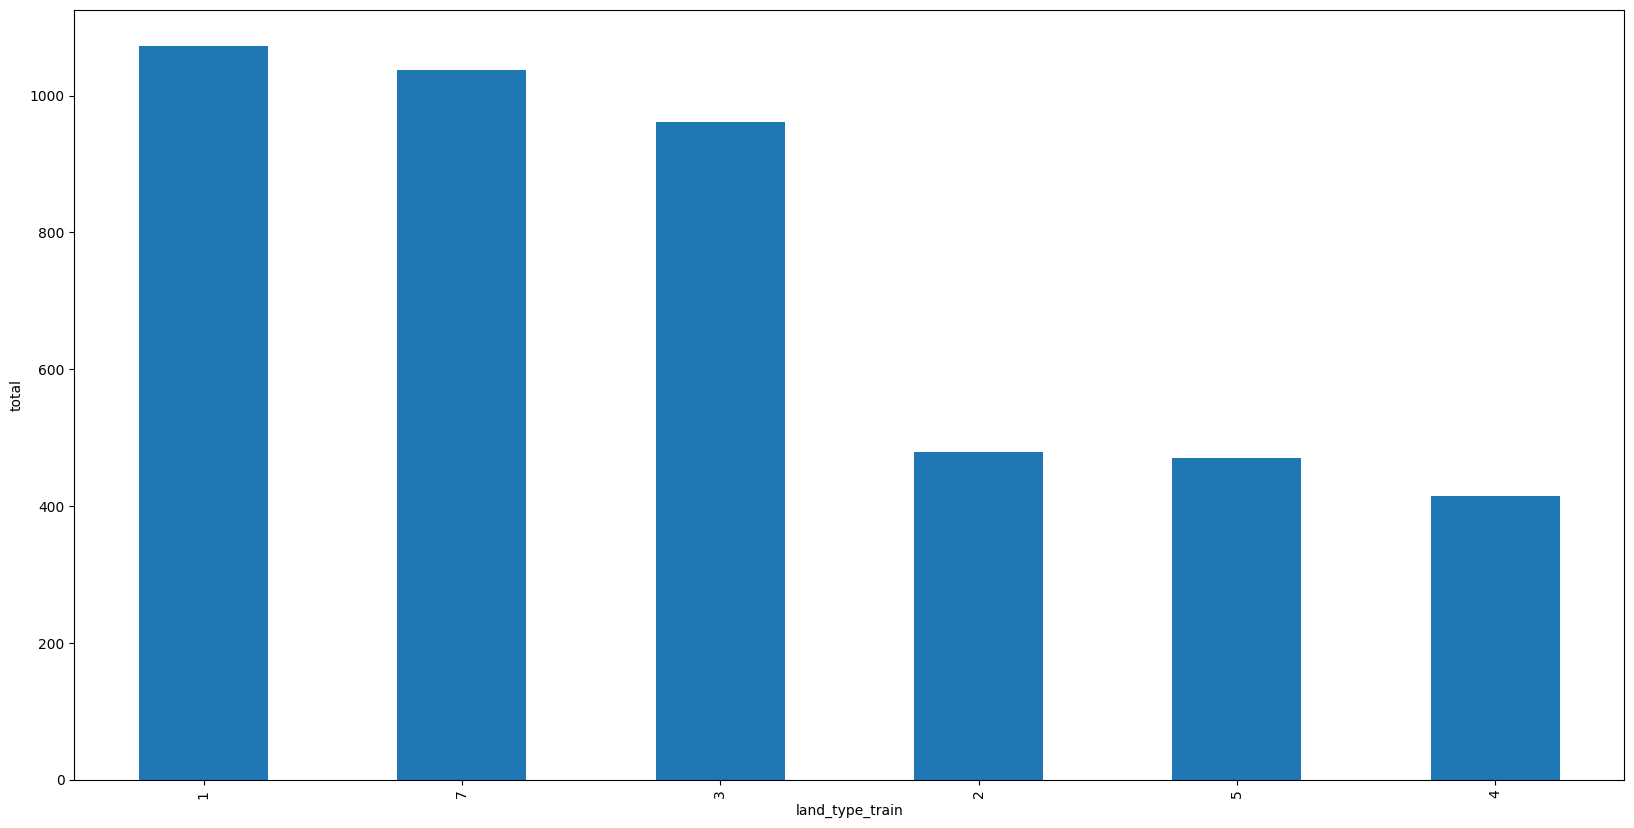

In [10]:
dfland_type_train = landsat_train['land_type'].value_counts()
print(dfland_type_train)
dfland_type_train.plot(kind="bar", xlabel="land_type_train", ylabel="total", figsize=(20,10))

7    470
1    461
3    397
5    237
2    224
4    211
Name: land_type, dtype: int64


<Axes: xlabel='land_type_test', ylabel='total'>

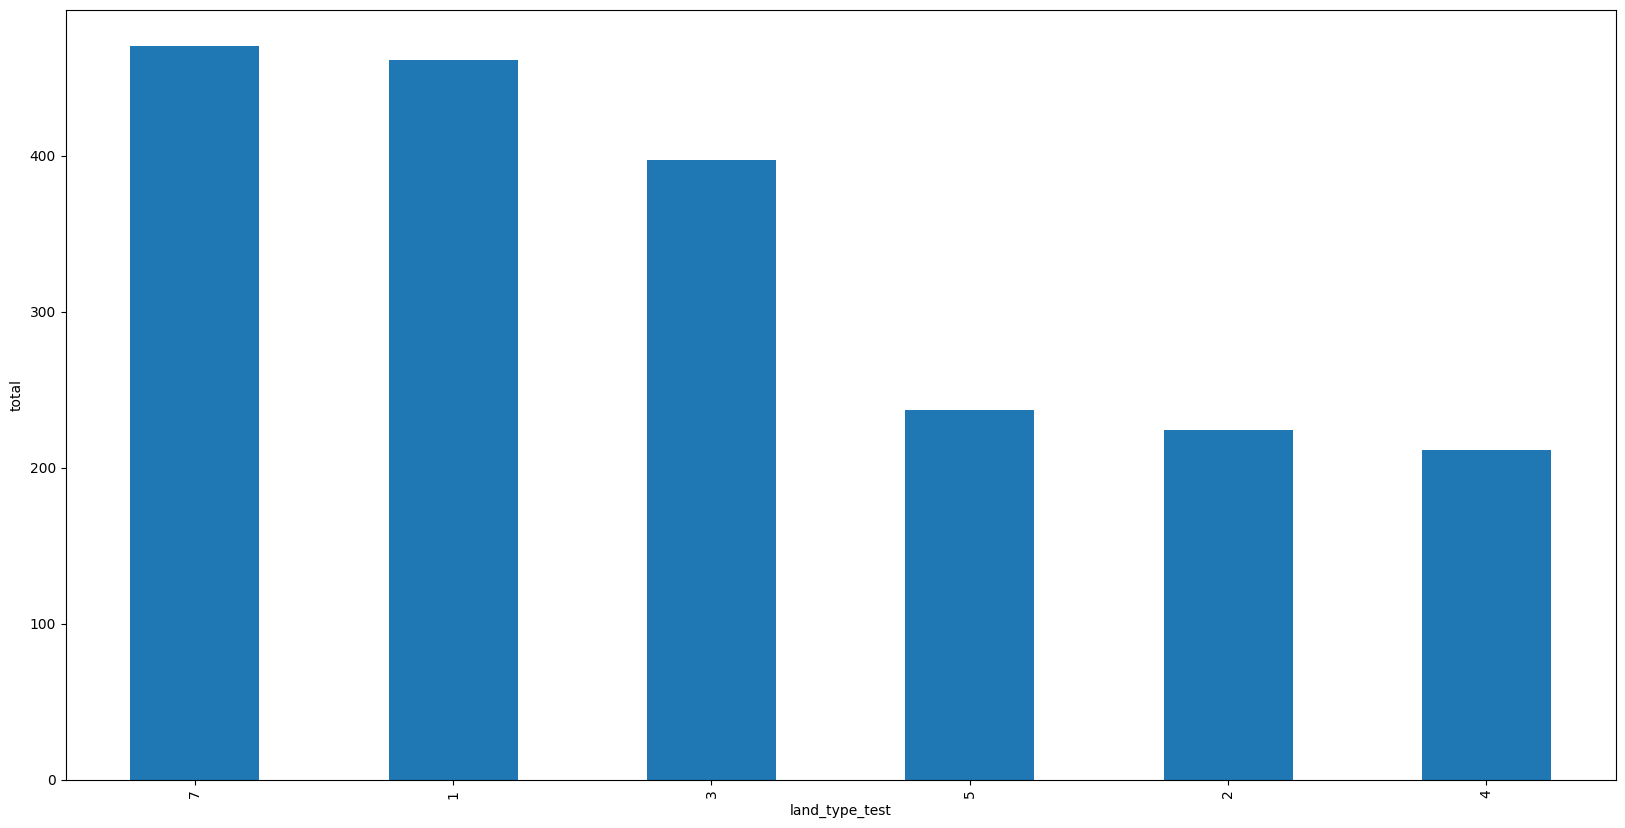

In [11]:
dfland_type_test = landsat_test['land_type'].value_counts()
print(dfland_type_test)
dfland_type_test.plot(kind="bar", xlabel="land_type_test", ylabel="total", figsize=(20,10))

**4. Splitting into Train/Test**

In [12]:
X_train = landsat_train.iloc[:,0:-1]
X_test = landsat_test.iloc[:,0:-1]
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']


**5. Building Pipeline**

In [13]:
num_attribs = landsat_train.columns[0:-1]

In [14]:
col_transform = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)])

In [15]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=1000, bootstrap=True, n_jobs=-1))
                     ])
     

**6. Executing the Model**

In [16]:
random_forest.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_l...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(max_samples=1000, n_estimators=1000,
                                        n_jobs=-1))])

**7. Evaluating the Model**

In [17]:
y_pred = random_forest.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       461
           2       0.98      0.97      0.97       224
           3       0.87      0.95      0.91       397
           4       0.74      0.61      0.67       211
           5       0.92      0.81      0.86       237
           7       0.85      0.88      0.86       470

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000



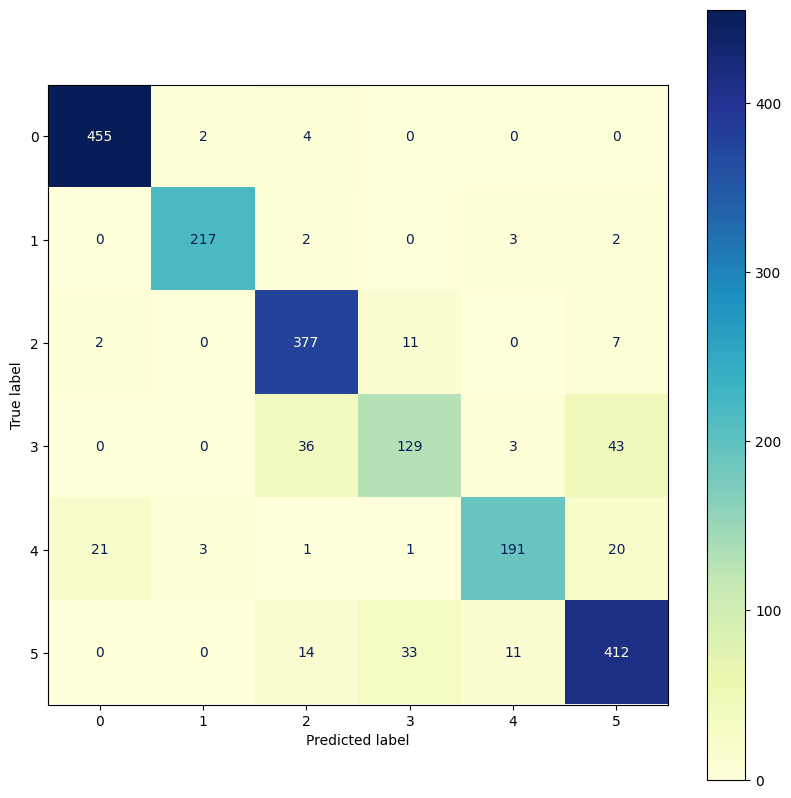

In [19]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots(figsize = (10,10))
disp.plot(ax=ax, cmap='YlGnBu')



**8. Conclusion**

This model appears decently sutiable at predicting the land type. It has an overall accuracy of 89% which is pretty good, looking deeper into the data though we received from the classification report land type 4 only has a f1 score of 66%, the rest of the land types have f1 scores anywhere from 85% to 97%. From this we can surmize that this model is good to great at predicting every land type except 4.  

##Problem 2

**Sections 1-4 were already completed above**

**Section 5 Building the Pipeline**

In [20]:
num_attribs = landsat_train.columns[0:-1]

In [21]:
bagging = Pipeline([
                     ('transform', col_transform),
                     ('bagging',BaggingClassifier(DecisionTreeClassifier(),n_estimators=1000, max_samples=1000, bootstrap=True, n_jobs=-1))
                     ])

**6. Executing the Model**

In [22]:
bagging.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_l...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('bagging',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=1000, n_estimators=1000,
                                   n_jobs=-1))])

**7. Evaluating the Model**

In [23]:
y_pred = bagging.predict(X_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       461
           2       0.99      0.96      0.97       224
           3       0.87      0.95      0.91       397
           4       0.72      0.61      0.66       211
           5       0.89      0.80      0.84       237
           7       0.84      0.87      0.86       470

    accuracy                           0.89      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.88      0.89      0.88      2000



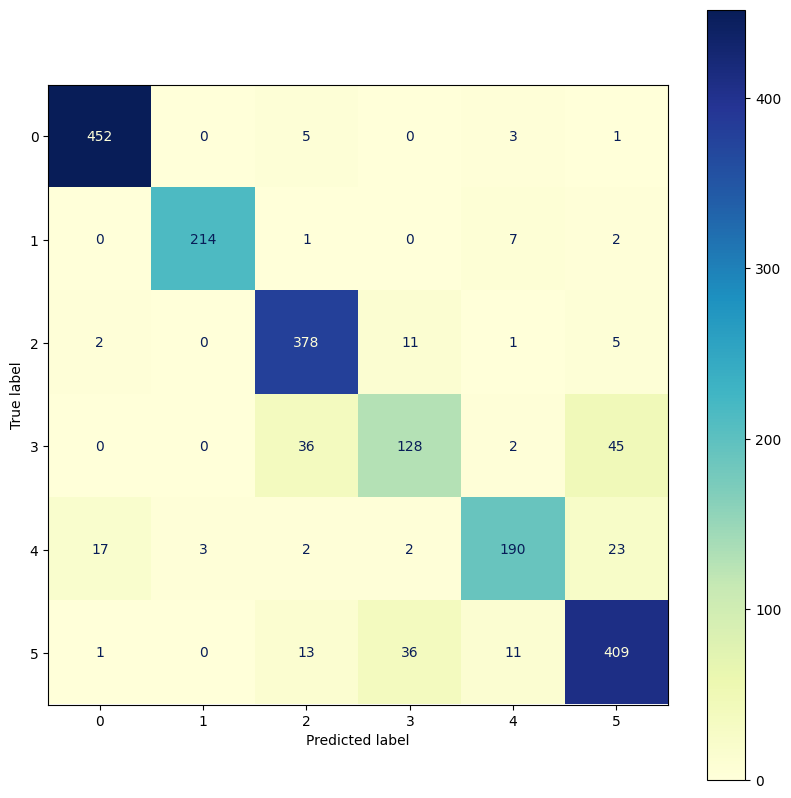

In [25]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots(figsize = (10,10))
disp.plot(ax=ax, cmap='YlGnBu')

**8. Conclusion**

Using a Bagging Classifier on this data set produces almost the exact same results as the Random Forest Classifer. Both have 89% accuracies scores, with almost identical F1 scores for every land type except the land type we needed to improve upon the most land type 4 we actually went down on. Overall then this model is also pretty suitable for predicting land type.

##Problem 3

**2. Aquire Data**

In [26]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

**3. Statistics and Visual Exploration**

Completed in other MLA assignments on this data set

**4. Splitting Data into Train/Test**

In [27]:
X = df[['variance', 'skewness','curtosis', 'entropy']]
y = df['forgery']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=24)

**5. Building the Pipeline**

In [29]:
num_attribs = ['variance', 'skewness','curtosis', 'entropy']

In [30]:
col_transform = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)])

In [31]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=2000, max_samples=1000, bootstrap=True, n_jobs=-1))
                     ])

**6. Executing the Model**

In [32]:
random_forest.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=1000, n_estimators=2000,
                                        n_jobs=-1))])

**7. Evaluating the Model**

In [33]:
y_pred = random_forest.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       149
           1       0.98      1.00      0.99       126

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



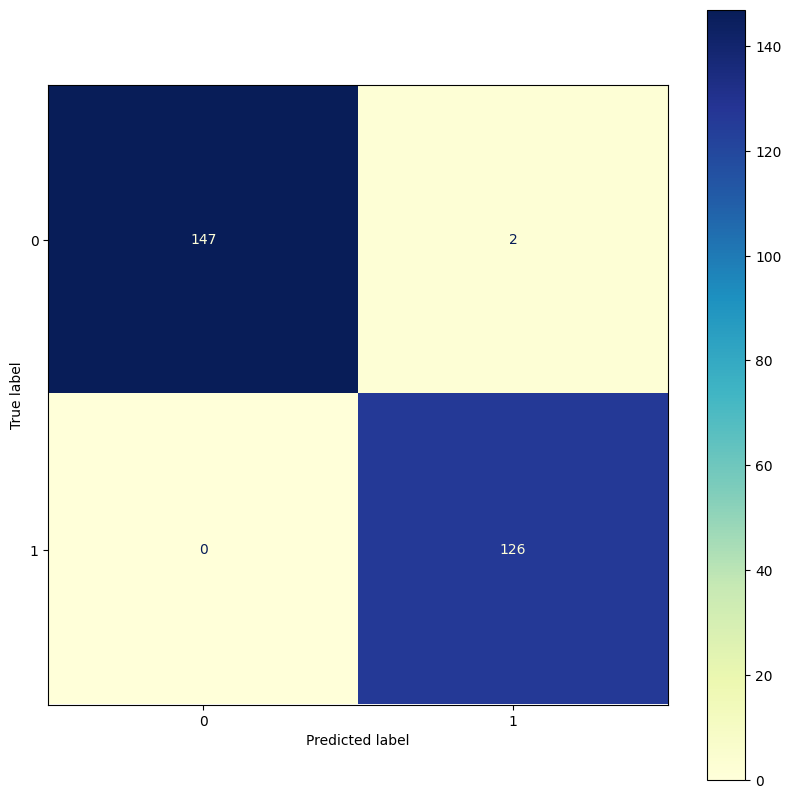

In [35]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
fig, ax = plt.subplots(figsize = (10,10))
disp.plot(ax=ax, cmap='YlGnBu')

**8. Conclusion**

Using a random forest classifer on the Bank forgery data set has proven to be the most suitable model yet. The other models we have used on this data set have all had very high f1 and accuracy scores, but this model is at 99% or above in every statistical category, there was little room for improvement to begin with but this model found that room and is predicting real and fake bank notes almost perfectly.